In [2]:
import os
import json
import numpy as np
import pandas as pd
from glob import glob
import tifffile as tiff 
import matplotlib.pyplot as plt

In [3]:
# File paths

BASE_FILE_PATH = "../input/hubmap-kidney-segmentation/"
TRAIN_FILES = BASE_FILE_PATH + "train/"
TEST_FILES = BASE_FILE_PATH + "test/"

In [4]:
# Listing files present in main location

os.listdir(BASE_FILE_PATH)

['sample_submission.csv',
 'HuBMAP-20-dataset_information.csv',
 'train.csv',
 'test',
 'train']

In [5]:
# Loading the train csv file

train_df = pd.read_csv(os.path.join(BASE_FILE_PATH, "train.csv"))

In [6]:
train_df.head()

,id,encoding
0,2f6ecfcdf,296084587 4 296115835 6 296115859 14 296147109...
1,aaa6a05cc,30989109 59 31007591 64 31026074 68 31044556 7...
2,cb2d976f4,78144363 5 78179297 15 78214231 25 78249165 35...
3,0486052bb,101676003 6 101701785 8 101727568 9 101753351 ...
4,e79de561c,7464094 14 7480273 41 7496453 67 7512632 82 75...


In [7]:
# Loading the csv file which contains significant information about the dataset

hubmap_info_df = pd.read_csv(BASE_FILE_PATH + 'HuBMAP-20-dataset_information.csv')

In [8]:
hubmap_info_df.head()

,image_file,width_pixels,height_pixels,anatomical_structures_segmention_file,glomerulus_segmentation_file,patient_number,race,ethnicity,sex,age,weight_kilograms,height_centimeters,bmi_kg/m^2,laterality,percent_cortex,percent_medulla
0,afa5e8098.tiff,43780,36800,afa5e8098-anatomical-structure.json,afa5e8098.json,67347,White,Not Hispanic or Latino,Female,58,59.0,160.0,23.0,Right,55,45
1,54f2eec69.tiff,22240,30440,54f2eec69-anatomical-structure.json,54f2eec69.json,67548,Black or African American,Not Hispanic or Latino,Male,58,79.9,190.5,22.0,Right,75,25
2,1e2425f28.tiff,32220,26780,1e2425f28-anatomical-structure.json,1e2425f28.json,63921,White,Not Hispanic or Latino,Male,48,131.5,193.0,35.3,Right,65,35
3,e79de561c.tiff,27020,16180,e79de561c-anatomical-structure.json,e79de561c.json,67026,Black or African American,Not Hispanic or Latino,Male,53,73.0,166.0,26.5,Left,55,45
4,c68fe75ea.tiff,19780,26840,c68fe75ea-anatomical-structure.json,c68fe75ea.json,67112,White,Not Hispanic or Latino,Male,56,91.2,167.6,32.5,Left,80,20


In [9]:
# Loading the sample submission file

sample_df = pd.read_csv(BASE_FILE_PATH + "sample_submission.csv")

In [10]:
# Checking the sample submission

sample_df.head()

,id,predicted
0,b9a3865fc,NaN
1,b2dc8411c,NaN
2,26dc41664,NaN
3,c68fe75ea,NaN
4,afa5e8098,NaN


In [11]:
# Train files

train_tiff_files = glob(BASE_FILE_PATH + "train/*.tiff")

In [12]:
train_tiff_files

['../input/hubmap-kidney-segmentation/train/095bf7a1f.tiff',
 '../input/hubmap-kidney-segmentation/train/e79de561c.tiff',
 '../input/hubmap-kidney-segmentation/train/0486052bb.tiff',
 '../input/hubmap-kidney-segmentation/train/aaa6a05cc.tiff',
 '../input/hubmap-kidney-segmentation/train/2f6ecfcdf.tiff',
 '../input/hubmap-kidney-segmentation/train/54f2eec69.tiff',
 '../input/hubmap-kidney-segmentation/train/1e2425f28.tiff',
 '../input/hubmap-kidney-segmentation/train/cb2d976f4.tiff']

In [13]:
# Plotting a sample image

sample_tiff_file_2 = tiff.imread('../input/hubmap-kidney-segmentation/train/0486052bb.tiff')

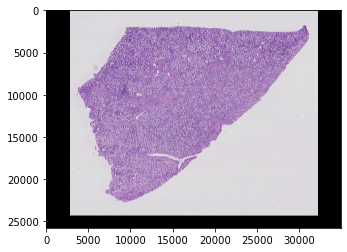

In [15]:
plt.imshow(sample_tiff_file_2)
plt.show()

In [ ]:
# Run length encoding to mask

# Reference: https://www.kaggle.com/kamaljain77/hubmap-kidney-eda

def rle2mask(mask_rle, shape):
    
    split_string = mask_rel.split()
    
    string_start,string_length = [np.asarray(value, dtype = int) for value in (s[0:][::2], s[1:][::2])]
    
    starts -= 1
    
    string_endend = string_start + string_length
    
    image = np.zeros(shape[0] * shape[1], dtype = np.uint8)
    
    for low, high in zip(string_start, string_end):
        
        image[low:high] = 1
        
    return image.reshape(shape).T
    
    
    

In [ ]:
# Reference: https://www.kaggle.com/mpware/masks-quick-eda

masks_info = {}

for file in hubmap_mask_files:
    
    with open(TRAIN_FILES + file) as jsonFile:
        json_info = json.load(jsonFile)
        mask_key = file.split(".")[0]
        masks_info[mask_key] = []
#         print(len(json_info))

        for index in range(len(json_info)):
        
#             print(json_info[index]['properties']['classification']['name'])

            if(json_info[index]['properties']['classification']['name'] == 'glomerulus'):
                coords = np.array(json_info[index]['geometry']['coordinates'])
                masks_info[mask_key].append(coords)
                
        
#         print(masks_info[mask_key])
#         print(file.split(".")[0])
#         print(masks_info[file.split(".")[0]])

In [ ]:
json_info